# Principal Component Analysis

## import library

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [14]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]


number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

## plot the input data

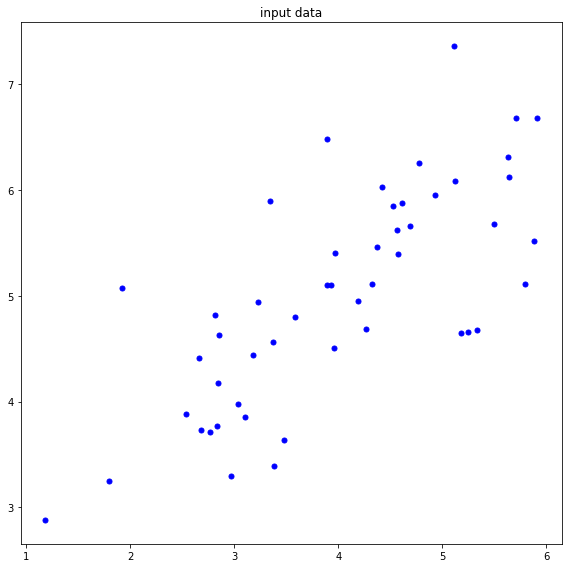

In [15]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue', s=25, marker='o')

plt.axis('auto')
plt.tight_layout()
plt.show()

## Normalization (Z-scoring)

mean of x =  -1.509903313490213e-16
mean of y =  -4.840572387365683e-16
std of x =  0.9999999999999999
std of y =  0.9999999999999999


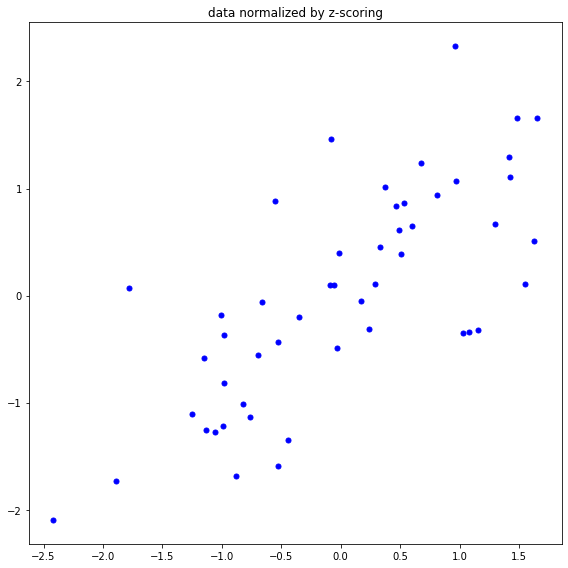

In [33]:
plt.figure(figsize=(8,8))
plt.title('data normalized by z-scoring')
# ===================================================
normal_x = (x - np.mean(x)) / np.std(x)
normal_y = (y - np.mean(y)) / np.std(y)

normal_feature = np.vstack((normal_x,normal_y)).transpose()

print("mean of x = ", np.mean(normal_x))
print("mean of y = ", np.mean(normal_y))
print("std of x = ", np.std(normal_x))
print("std of y = ", np.std(normal_y))
plt.scatter(normal_x, normal_y, color='blue', s=25, marker='o')
plt.axis('auto')
# ===================================================
plt.tight_layout()
plt.show()

## compute covariance matrix

In [16]:
def compute_covariance(feature):
    Sigma = (np.matmul(np.transpose(feature),feature) ) / feature.shape[0]
    return Sigma

In [18]:
def compute_eigen(X): # X is sigma
    S, U = np.linalg.eig(X)
    return S, U

In [34]:
def plot_data(normal_feature):
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')

    normal_x = normal_feature[:, 0]
    normal_y = normal_feature[:, 1]

    plt.scatter(normal_x, normal_y, color='blue', s=25, marker='o')
    plt.axis('auto')

    plt.tight_layout()
    plt.show()

In [37]:
## compute principal directions
Sigma = compute_covariance(normal_feature)
S, U = compute_eigen(Sigma)

first_pc = max(S)
first_pc_index = np.where(S == first_pc)
first_pc_vector = U[:, first_pc_index[0][0]]

second_pc = max(np.delete(S, first_pc_index))
second_pc_index = np.where(S == second_pc)
second_pc_vector = U[:, second_pc_index[0][0]]


In [38]:
def plot_principal_direction(normal_feature):
    normal_x = normal_feature[:, 0]
    normal_y = normal_feature[:, 1]

    plt.figure(figsize=(8,8))
    plt.title('principal directions')

    Sigma = compute_covariance(normal_feature)
    S, U = compute_eigen(Sigma)

    first_pc = max(S)
    first_pc_index = np.where(S == first_pc)
    first_pc_vector = U[:, first_pc_index[0][0]]

    second_pc = max(np.delete(S, first_pc_index))
    second_pc_index = np.where(S == second_pc)
    second_pc_vector = U[:, second_pc_index[0][0]]

    origin = np.array([[0,0],[0,0]])

    plt.scatter(normal_x, normal_y, color='blue', s=25, marker='o')
    plt.quiver(*origin, first_pc_vector[0] * first_pc ,first_pc_vector[1]*first_pc, color='r', angles='xy', scale=1, scale_units='xy')
    plt.quiver(*origin, second_pc_vector[0] * second_pc,second_pc_vector[1] * second_pc, color='g', angles='xy', scale=1, scale_units='xy')

    plt.axis('auto')
    plt.tight_layout()
    plt.show()

## first principal axis

In [58]:
def plot_first_principle_axis(normal_feature, first_pc_vector):
    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    normal_x =normal_feature[:, 0]
    normal_y = normal_feature[:, 1]

    func = normal_x * (first_pc_vector[1] /  first_pc_vector[0])
    plt.scatter(normal_x, normal_y, color='blue', s=25, marker='o')
    plt.plot(normal_x, func, 'r')
    plt.tight_layout()
    plt.show()

## second principal axis

In [59]:
def plot_second_principle_axis(normal_feature, second_pc_vector):
    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    normal_x =normal_feature[:, 0]
    normal_y = normal_feature[:, 1]

    func2 = normal_x *(second_pc_vector[1] /  second_pc_vector[0])
    plt.scatter(normal_x, normal_y, color='blue', s=25, marker='o')
    plt.plot(normal_x, func2, 'r')
    plt.tight_layout()
    plt.show()

## compute the projection of point onto the line

In [23]:
def compute_projection_onto_line(feature, vector):
    v_norm = np.sqrt(sum(vector**2))
    v_norm_vector =  vector / v_norm
    projection = np.zeros((50,2))

    temp = np.dot(feature,vector) / v_norm
    for i in range(temp.shape[0]):
        projection[i] = (temp[i]*v_norm_vector)

    return projection
projection = compute_projection_onto_line(normal_feature, first_pc_vector)


## projcet to the first principal axis

In [53]:
def projection_first_principal_axis(normal_feature, first_pc_vector):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')

    normal_x =normal_feature[:, 0]
    normal_y = normal_feature[:, 1]

    func = normal_x *(first_pc_vector[1] /  first_pc_vector[0])
    plt.scatter(normal_x, normal_y, color='blue', s=25, marker='o')

    projection = compute_projection_onto_line(normal_feature, first_pc_vector)
    plt.scatter(projection[:, 0],projection[:,1], color='green', s=25, zorder=1)
    plt.plot(normal_x, func, 'r', zorder=-1)
    plt.tight_layout()
    plt.show()

## projcet to the second principal axis

In [60]:
def projection_second_principal_axis(normal_feature, second_pc_vector):

    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    normal_x =normal_feature[:, 0]
    normal_y = normal_feature[:, 1]

    func2= normal_x *(second_pc_vector[1] /  second_pc_vector[0])
    plt.scatter(normal_x, normal_y, color='blue', s=25, marker='o')

    projection = compute_projection_onto_line(normal_feature, second_pc_vector)
    plt.scatter(projection[:, 0],projection[:,1], color='green', s=25, zorder=1)
    plt.plot(normal_x, func2, 'r', zorder=-1)

    plt.tight_layout()
    plt.show()

## connect original data to the projection onto the first principal axis

In [61]:
def connect_projection_to_first_axis(normal_feature, first_pc_vector):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')
    normal_x =normal_feature[:, 0]
    normal_y = normal_feature[:, 1]

    func = normal_x *(first_pc_vector[1] /  first_pc_vector[0])
    plt.scatter(normal_x, normal_y, color='blue', s=25, marker='o')

    projection = compute_projection_onto_line(normal_feature, first_pc_vector)
    plt.scatter(projection[:, 0],projection[:,1], color='green', s=25, zorder=1)
    plt.plot(normal_x, func, 'r', zorder=-1)

    for i in range(feature.shape[0]):
        plt.plot([normal_x[i], projection[:, 0][i]], [normal_y[i], projection[:, 1][i]],  'gray')
 
    plt.tight_layout()
    plt.show()

## connect original data to the projection onto the second principal axis

In [62]:
def connect_projection_to_second_axis(normal_feature, second_pc_vector):
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')
    normal_x =normal_feature[:, 0]
    normal_y = normal_feature[:, 1]

    func2 = normal_x *(second_pc_vector[1] /  second_pc_vector[0])
    plt.scatter(normal_x, normal_y, color='blue', s=25, marker='o')

    projection = compute_projection_onto_line(normal_feature, second_pc_vector)
    plt.scatter(projection[:, 0],projection[:,1], color='green', s=25, zorder=1)
    plt.plot(normal_x, func2, 'r', zorder=-1)

    for i in range(feature.shape[0]):
        plt.plot([normal_x[i], projection[:, 0][i]], [normal_y[i], projection[:, 1][i]], 'gray')

    plt.tight_layout()
    plt.show()

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

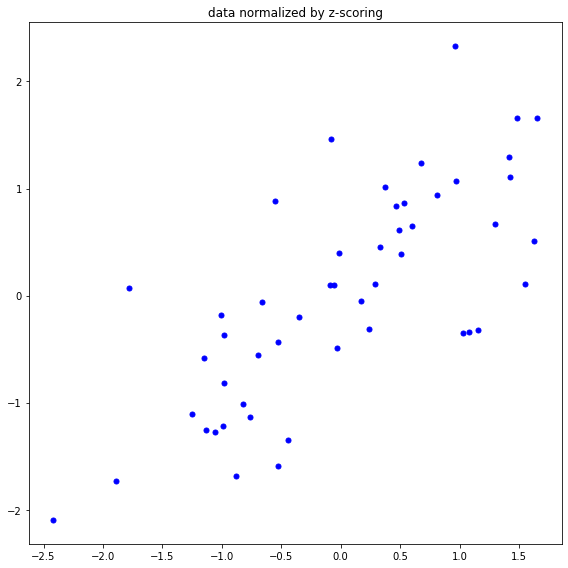

In [35]:
plot_data(normal_feature)

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

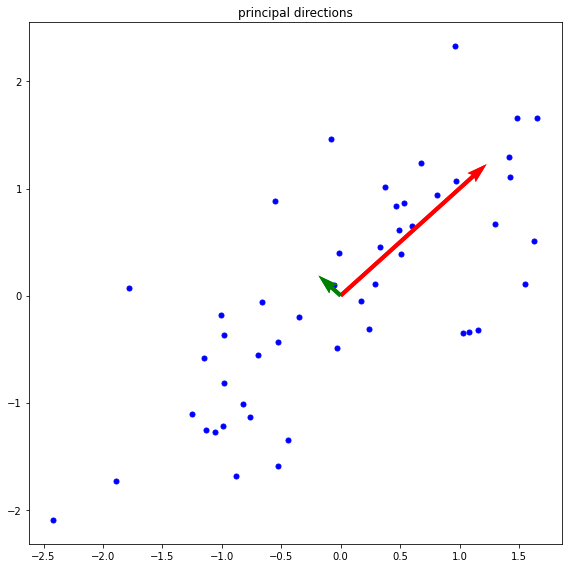

In [40]:
plot_principal_direction(normal_feature)

***

### 3. plot the first principal axis in red on the normalized data in blue

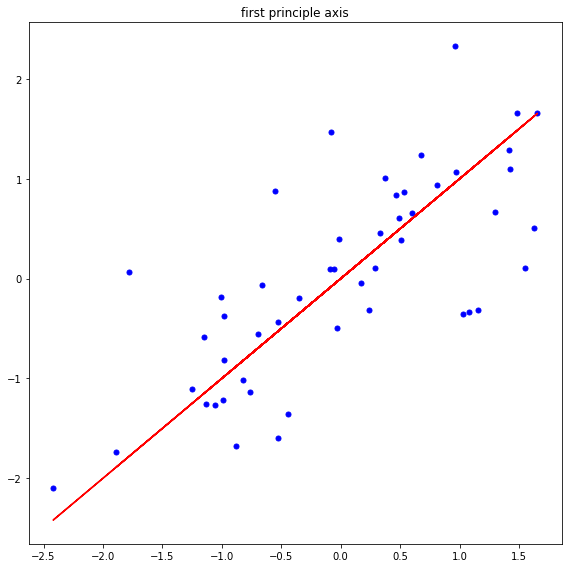

In [63]:
plot_first_principle_axis(normal_feature, first_pc_vector)

***

### 4. plot the second principal axis in red on the normalized data in blue

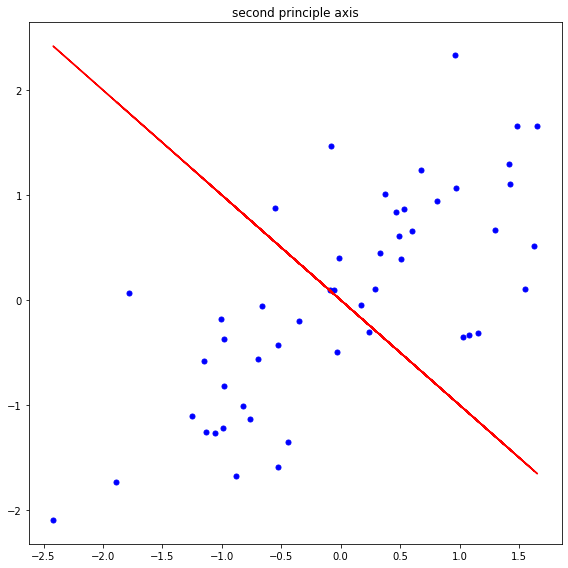

In [64]:
plot_second_principle_axis(normal_feature, second_pc_vector)

***

### 5. plot the projection of data in green onto the first principal axis in red

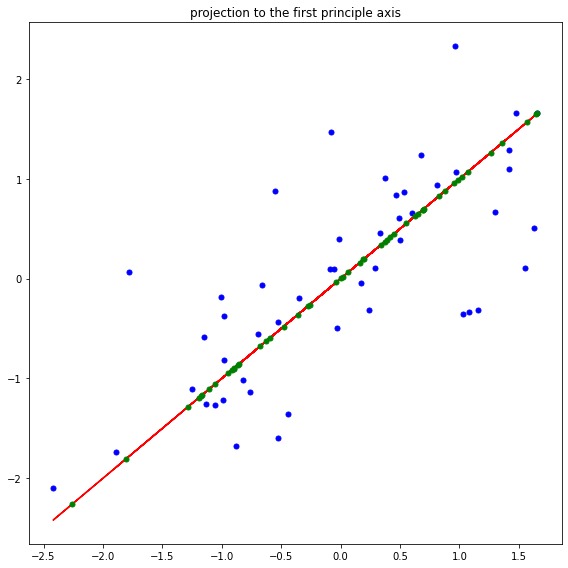

In [65]:
projection_first_principal_axis(normal_feature, first_pc_vector)

***

### 6. plot the projection of data in green onto the second principal axis in red

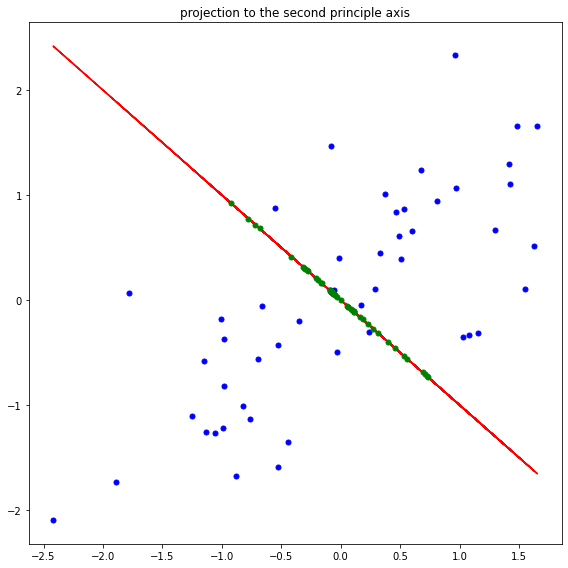

In [66]:
projection_second_principal_axis(normal_feature, second_pc_vector)

***

### 7. plot the projection line in grey onto the first principal axis

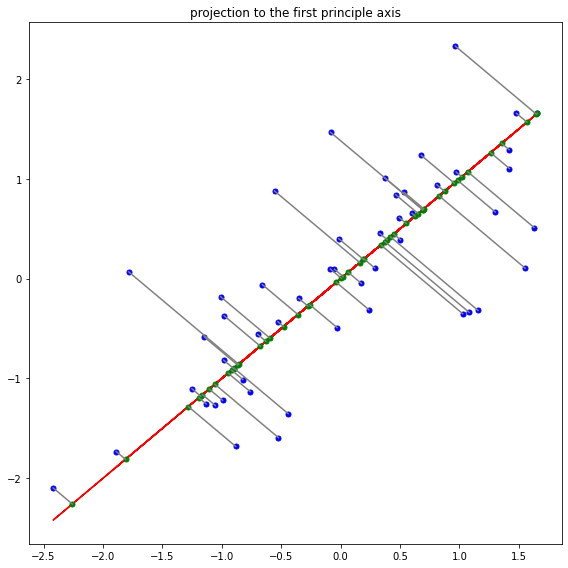

In [67]:
connect_projection_to_first_axis(normal_feature, first_pc_vector)

***

### 8. plot the projection line in grey onto the second principal axis

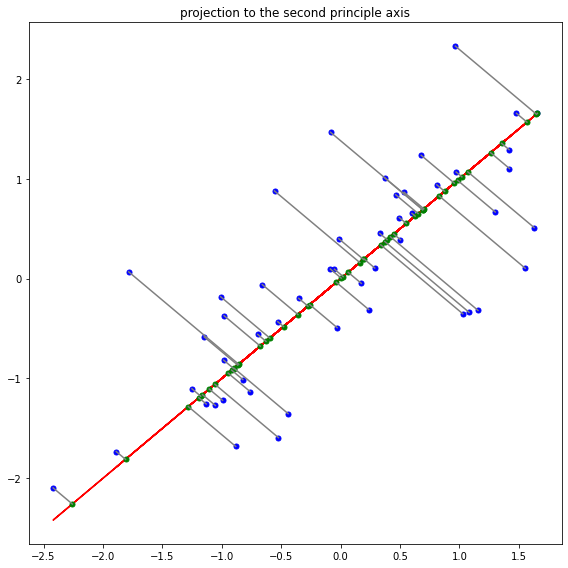

In [68]:
connect_projection_to_second_axis(normal_feature, first_pc_vector)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***